In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('voting_eligibility_dataset.csv')

df.head()


,Nationality,Age,Status,Eligible_for_Voting
0,Indian,85,alive,Yes
1,Indian,67,dead,No
2,Indian,19,alive,Yes
3,Indian,38,alive,Yes
4,British,42,alive,No


In [3]:
df["Nationality"] = df["Nationality"].apply(lambda x: 1 if x == "Indian" else 0)
df["Status"] = df["Status"].apply(lambda x: 1 if x == "alive" else 0)
df["Eligible_for_Voting"] = df["Eligible_for_Voting"].apply(lambda x: 1 if x == "Yes" else 0)

In [4]:
df.head()

,Nationality,Age,Status,Eligible_for_Voting
0,1,85,1,1
1,1,67,0,0
2,1,19,1,1
3,1,38,1,1
4,0,42,1,0


In [5]:
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4) 

# The remaining 25% is used for testing  it drops the training data
# from the original dataframe
test_df = df.drop(train_df.index)

In [6]:
# now let's separate the targets and labels
x_train = train_df.drop('Eligible_for_Voting', axis=1)
y_train = train_df['Eligible_for_Voting']
x_test = test_df.drop('Eligible_for_Voting', axis=1)
y_test = test_df['Eligible_for_Voting']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable 
# to save it.
input_shape = [x_train.shape[1]]

input_shape

[3]

In [7]:
# Create Model Neural Network, creating a lineaar model
import tensorflow as tf
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=input_shape)])

model.summary()


c:\Users\mural\OneDrive\Desktop\internship\tensorflowproj\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Creating a Multiple Layer Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
] )

model.summary()

c:\Users\mural\OneDrive\Desktop\internship\tensorflowproj\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss = 'mae')

In [14]:
# There are optimization methods that you can use such as early stopping that will automatically stop the training when the model starts overfitting,
model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test),
          batch_size=32,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2970 - val_loss: 0.2803
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2970 - val_loss: 0.2802
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2969 - val_loss: 0.2802
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2969 - val_loss: 0.2802
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2969 - val_loss: 0.2802
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2969 - val_loss: 0.2802
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2968 - val_loss: 0.2801
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2968 - val_loss: 0.2801
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2968 - val_loss: 0.2801
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2968 - val_loss: 0.2801
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2968 - val_loss: 0.2801
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2968 - val_loss: 0.2801

In [15]:
model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[4.45187202e-22],
       [1.55692334e-10],
       [5.98699421e-14],
       [3.40093080e-14],
       [7.52661091e-21],
       [5.52822543e-09],
       [2.21130758e-13],
       [3.49312523e-16],
       [7.94207324e-07],
       [1.43654966e-22],
       [2.74081063e-10],
       [7.62739046e-06],
       [5.59879361e-08],
       [1.34340511e-16],
       [3.99828011e-15],
       [1.01220031e-12],
       [8.84415180e-11],
       [1.09743147e-14],
       [5.90562679e-15],
       [1.47659113e-04],
       [1.47659548e-17],
       [2.56374291e-21],
       [2.30251524e-14],
       [2.52890934e-22],
       [4.69936987e-22],
       [8.96603902e-10],
       [1.34340511e-16],
       [2.30251524e-14],
       [5.60090132e-22],
       [3.44821505e-10],
       [1.17367069e-17],
       [2.15134395e-18],
       [3.95683492e-05],
       [1.62114922e-11],
       [9.38070315e-08],
       [7.32801631e-19],
       [5.30327032e-11],
       [2.66951237e-22],
       [6.75971526e-14],
       [3.54122622e-15],


In [16]:
y_test

0      1
3      1
9      0
21     0
22     1
      ..
381    0
385    1
391    0
395    0
398    1
Name: Eligible_for_Voting, Length: 100, dtype: int64

<Axes: >

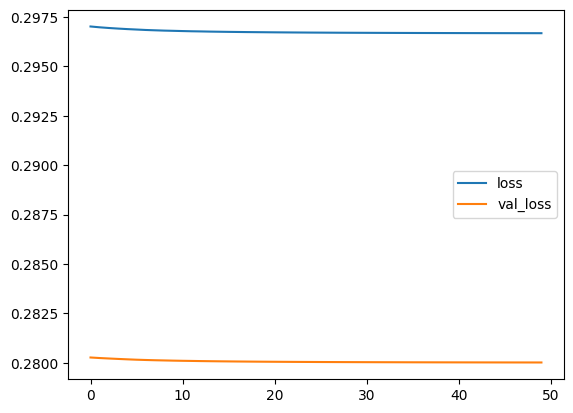

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()